In [205]:
#%%imports
import importlib
import numpy as np
import polars as pl

from lstein import (
    utils as lsu,
    makedata as md
)
from lstein import lstein
importlib.reload(lstein)


<module 'lstein.lstein' from '/home/lukas/github/LStein/src/lstein/lstein.py'>

In [206]:
#generate some data
raw, pro = md.simulate(5, opt="sin")
df_raw = pl.from_dict(raw).sample(2000).sort("period", "time") #subsample to get random sequence lengths 
df_pro = pl.from_dict(pro).sample(1800).sort("period", "time") #subsample to get random sequence lengths
print(df_raw)

shape: (2_000, 5)
┌────────┬────────────┬───────────┬─────────────┬────────────┐
│ period ┆ time       ┆ amplitude ┆ amplitude_e ┆ processing │
│ ---    ┆ ---        ┆ ---       ┆ ---         ┆ ---        │
│ f64    ┆ f64        ┆ f64       ┆ f64         ┆ str        │
╞════════╪════════════╪═══════════╪═════════════╪════════════╡
│ 14.2   ┆ -50.0      ┆ -0.178463 ┆ NaN         ┆ raw        │
│ 14.2   ┆ -50.0      ┆ 0.14269   ┆ NaN         ┆ raw        │
│ 14.2   ┆ -49.398798 ┆ -0.196847 ┆ NaN         ┆ raw        │
│ 14.2   ┆ -49.398798 ┆ -0.284657 ┆ NaN         ┆ raw        │
│ 14.2   ┆ -49.398798 ┆ 0.376402  ┆ NaN         ┆ raw        │
│ …      ┆ …          ┆ …         ┆ …           ┆ …          │
│ 34.6   ┆ 97.59519   ┆ -0.589515 ┆ NaN         ┆ raw        │
│ 34.6   ┆ 98.496994  ┆ -0.51819  ┆ NaN         ┆ raw        │
│ 34.6   ┆ 98.797595  ┆ -0.265709 ┆ NaN         ┆ raw        │
│ 34.6   ┆ 100.0      ┆ -0.560585 ┆ NaN         ┆ raw        │
│ 34.6   ┆ 100.0      ┆ -1.178087 ┆ N

In [207]:
#get dimensions
##raw
df_raw_p = df_raw.partition_by("period")    #partition by unique values in `"period"`
theta_raw = [df["period"].to_numpy()[0] for df in df_raw_p]    #only one value per series
x_raw = [df["time"].to_numpy() for df in df_raw_p]             #K values per series
y_raw = [df["amplitude"].to_numpy() for df in df_raw_p]        #K values per series

print(f"{len(theta_raw)=}")
print(f"{len(x_raw)=}, Series Lengths: {list(map(len, x_raw))}")
print(f"{len(y_raw)=}, Series Lengths: {list(map(len, y_raw))}")

##processed
df_pro_p = df_pro.partition_by("period")    #partition by unique values in `"period"`
theta_pro = [df["period"].to_numpy()[0] for df in df_pro_p]    #only one value per series
x_pro = [df["time"].to_numpy() for df in df_pro_p]             #K values per series
y_pro = [df["amplitude"].to_numpy() for df in df_pro_p]        #K values per series

print(f"{len(theta_pro)=}")
print(f"{len(x_pro)=}, Series Lengths: {list(map(len, x_pro))}")
print(f"{len(y_pro)=}, Series Lengths: {list(map(len, y_pro))}")

len(theta_raw)=5
len(x_raw)=5, Series Lengths: [405, 397, 390, 400, 408]
len(y_raw)=5, Series Lengths: [405, 397, 390, 400, 408]
len(theta_pro)=5
len(x_pro)=5, Series Lengths: [354, 354, 365, 376, 351]
len(y_pro)=5, Series Lengths: [354, 354, 365, 376, 351]


In [208]:
#define ticks
thetaticks = np.linspace(5, 40, 5).astype(int)
xticks = np.linspace(-45, 80, 6).astype(int)
yticks = np.linspace(-2,2,5).astype(int)

In [209]:
#create a canvas
LSC = lstein.LSteinCanvas(
    thetaticks=thetaticks, xticks=xticks, yticks=yticks
)

### Standard Usage

In [210]:
#get colors for colormapping `theta`
colors = lsu.get_colors(theta_raw, "viridis")

#add different panels
for i in range(len(theta_raw)):
    
    #add a panel (similar to `ax = fig.add_subplot()`)
    LSP = LSC.add_panel(
        theta=theta_raw[i], #add panel at `theta_raw[i]`
    )

    #add a series to the panel
    LSP.plot(x_raw[i], y_raw[i], seriestype="scatter", c=colors[i])
    LSP.plot(x_pro[i], y_pro[i], seriestype="line", c="w", lw=3)
    LSP.plot(x_pro[i], y_pro[i], seriestype="line", color=colors[i])

/tmp/ipykernel_74975/1636926589.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


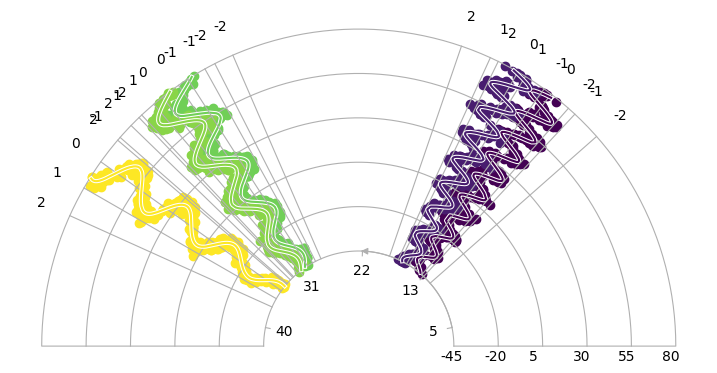

In [211]:
#display the plot
fig = lstein.draw(LSC, figsize=(9,9))
fig.show()

### Convenience Usage

In [ ]:
#add data to plot (automatically generates panels for you)
LSC.plot(theta_raw, x_raw, y_raw, seriestype="scatter")
LSC.plot(theta_pro, x_pro, y_pro, seriestype="line", series_kwargs=dict(c="w", lw=3))   #white outline to make discernable from scatter
LSC.plot(theta_pro, x_pro, y_pro, seriestype="line")

/tmp/ipykernel_74975/1636926589.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


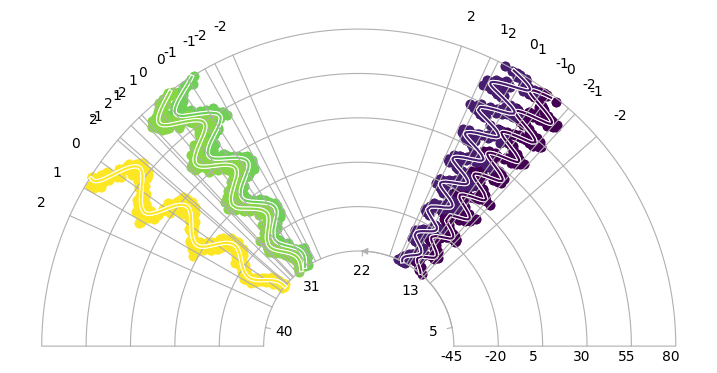

In [213]:
#display the plot
fig = lstein.draw(LSC, figsize=(9,9))
fig.show()